# 學習率測試

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

In [3]:
# 在訓練過程中顯示學習率
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._get_current_learning_rate()
    return lr

# 前 10 個 epochs 的學習率為固定值，之後逐次衰減
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return np.float64(lr * tf.math.exp(-0.1))

In [4]:
# 模型定義
model = tf.keras.models.Sequential([tf.keras.layers.Input((20,)), tf.keras.layers.Dense(10)])
optimizer = tf.keras.optimizers.Adam()
lr_metric = get_lr_metric(optimizer)
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy', lr_metric])

# 在 callback 中改變學習率
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# 模型訓練
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[callback], verbose=2)

Epoch 1/15
1/1 - 1s - 987ms/step - accuracy: 0.0000e+00 - loss: 1.4744 - lr: 0.0010 - learning_rate: 0.0010
Epoch 2/15
1/1 - 0s - 34ms/step - accuracy: 0.0000e+00 - loss: 1.4236 - lr: 0.0010 - learning_rate: 0.0010
Epoch 3/15
1/1 - 0s - 40ms/step - accuracy: 0.0000e+00 - loss: 1.4096 - lr: 0.0010 - learning_rate: 0.0010
Epoch 4/15
1/1 - 0s - 37ms/step - accuracy: 0.0000e+00 - loss: 1.3734 - lr: 0.0010 - learning_rate: 0.0010
Epoch 5/15
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 1.3734 - lr: 0.0010 - learning_rate: 0.0010
Epoch 6/15
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 1.3734 - lr: 0.0010 - learning_rate: 0.0010
Epoch 7/15
1/1 - 0s - 42ms/step - accuracy: 0.0000e+00 - loss: 1.3734 - lr: 0.0010 - learning_rate: 0.0010
Epoch 8/15
1/1 - 0s - 40ms/step - accuracy: 0.0000e+00 - loss: 1.3664 - lr: 0.0010 - learning_rate: 0.0010
Epoch 9/15
1/1 - 0s - 40ms/step - accuracy: 0.0000e+00 - loss: 1.3530 - lr: 0.0010 - learning_rate: 0.0010
Epoch 10/15
1/1 - 0s - 48ms/step - a

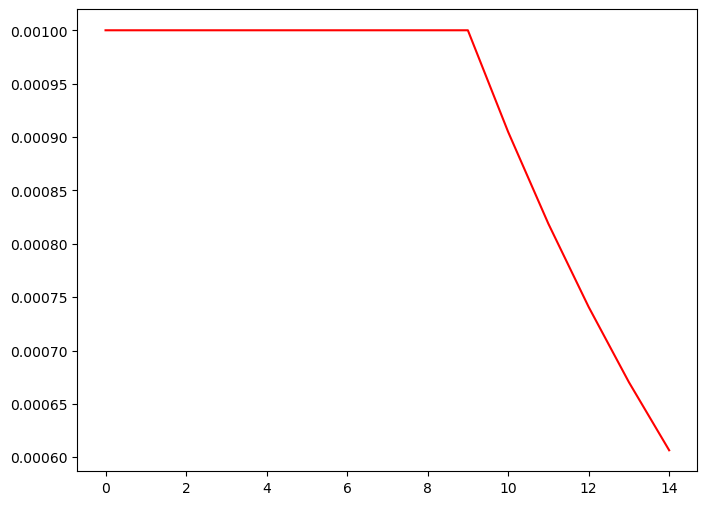

In [15]:
# 對訓練過程的學習率繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['lr'], 'r')